In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##Load dataset

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
outcome = data.iloc[:,8]
print(data.shape)
print(data.describe().T)



(768, 9)
                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
Outcome                   768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.0000

In [ ]:

d = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(d, columns = [data.columns])
scaled_df.head()
print(scaled_df.describe().T)
print(type(scaled_df.describe().T))

# norm_data = preprocessing.normalize(Insurance_Data, axis=0)
# norm_df = pd.DataFrame(norm_data,columns=[Insurance_Data.columns])

                          count      mean       std       min       25%  \
Pregnancies               768.0  0.027146  0.023789  0.000000  0.007060   
Glucose                   768.0  0.035007  0.008756  0.012659  0.028698   
BloodPressure             768.0  0.035588  0.005968  0.011821  0.031522   
SkinThickness             768.0  0.033932  0.012283  0.008927  0.026191   
Insulin                   768.0  0.028399  0.022277  0.003351  0.019098   
BMI                       768.0  0.035302  0.007479  0.019799  0.029916   
DiabetesPedigreeFunction  768.0  0.029538  0.020740  0.004883  0.015258   
Age                       768.0  0.034021  0.012036  0.021493  0.024563   
Outcome                   768.0  0.021316  0.029134  0.000000  0.000000   

                               50%       75%       max  
Pregnancies               0.021180  0.042360  0.120019  
Glucose                   0.033660  0.040349  0.057251  
BloodPressure             0.035463  0.039403  0.060090  
SkinThickness        

array([[<Axes: title={'center': "('Glucose',)"}>]], dtype=object)

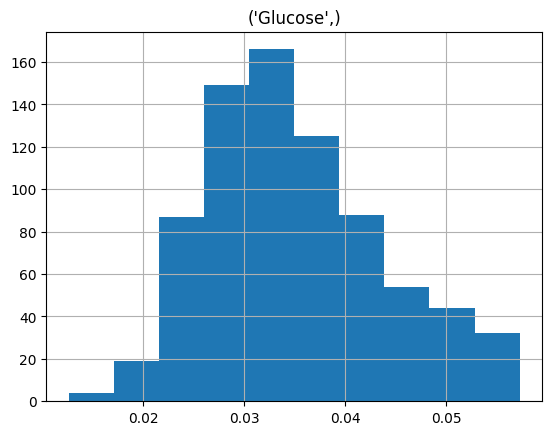

In [ ]:
scaled_df.hist(column="Glucose")

array([[<Axes: title={'center': "('BloodPressure',)"}>]], dtype=object)

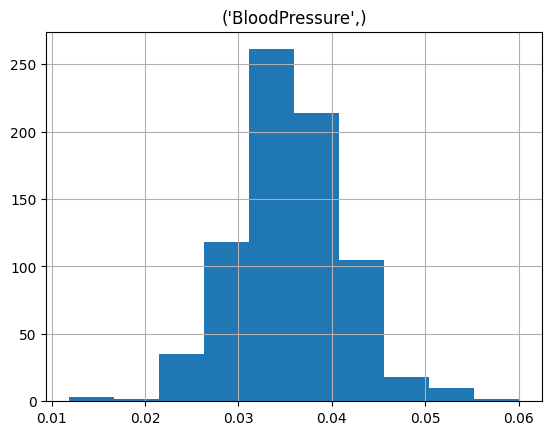

In [ ]:
scaled_df.hist(column="BloodPressure")

In [ ]:
X = scaled_df.iloc[:,0:8].to_numpy()
# dataset.iloc[:, 4]
print(X)
y = data.iloc[:,8].to_numpy()
print(y)


[[0.04235974 0.04257898 0.03546267 ... 0.03655192 0.03924821 0.05117289]
 [0.00705996 0.02445414 0.03250745 ... 0.02893694 0.02197149 0.03172719]
 [0.05647966 0.05264833 0.03152238 ... 0.02534702 0.04206507 0.03275065]
 ...
 [0.03529979 0.03481119 0.03546267 ... 0.0285018  0.01533622 0.03070373]
 [0.00705996 0.03624967 0.02955223 ... 0.03274443 0.02184629 0.04810252]
 [0.00705996 0.02675571 0.0344776  ... 0.03307079 0.019718   0.02353953]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [ ]:
x_train_df = pd.DataFrame(x_train,columns = features)
x_test_df = pd.DataFrame(x_test,columns = features)

##Train model

In [ ]:
model = Sequential()
model.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 76.91
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

## MAX - MIN

In [ ]:
testX = np.copy(x_test)
max = np.max(testX,axis=0)
print(max)

min = np.min(testX,axis=0)
print(min)

[0.12001927 0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]
[0.         0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]


In [ ]:
# #pregnancies
# X_preg_max = np.copy(testX)
# for i in range(len(X)):
#     X_preg_max[i][0] = max[0]
# _, accuracy = model.evaluate(X_preg_max, y, verbose=0)
# print('Accuracy: %.2f' % (accuracy*100))
# predictions_preg_max = model.predict(X_preg_max) 

# # reshape = predictions_preg_max.reshape(1,-1)
# # print(reshape)
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_max[i].tolist(), predictions_preg_max[i], y[i]))


In [ ]:
prediction_max = []
for j in range(8):
  X_max = np.copy(x_test)
  for i in range(len(x_test)):
    X_max[i][j] = max[j]
  _, accuracy = model.evaluate(X_max, y_test, verbose=0)
  predictions_sub_max = model.predict(X_max) 
  if len(prediction_max) == 0:
    prediction_max = predictions_sub_max
  else:
    prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
print(prediction_max)


8/8 [==============================] - 0s 2ms/step
[[0.47893876 0.8343479  0.16446078 ... 0.57292414 0.7493026  0.27282825]
 [0.7910905  0.8464595  0.42299888 ... 0.87277067 0.903595   0.43512753]
 [0.37697226 0.59460866 0.08136346 ... 0.47337863 0.53513515 0.20901671]
 ...
 [0.29303277 0.45730808 0.04509695 ... 0.4204321  0.30493867 0.13563788]
 [0.30152738 0.6909024  0.06576559 ... 0.39039642 0.45610717 0.173606  ]
 [0.91993743 0.8601736  0.60561025 ... 0.8501633  0.9156775  0.8323474 ]]


In [ ]:
# min = X.min()
# #save a copy
# X_preg_min = testX
# for i in range(len(X)):
#     X_preg_min.iloc[i][1] = min[0]
# _, accuracy = model.evaluate(X_preg_min, y, verbose=0)
# predictions_preg_min = model.predict(X_preg_min) 
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_min.iloc[i].tolist(), predictions_preg_min[i], y.iloc[i]))


In [ ]:
prediction_min = []
for j in range(8):
  X_min = np.copy(x_test)
  for i in range(len(x_test)):
    X_min[i][j] = min[j]
  _, accuracy = model.evaluate(X_min, y_test, verbose=0)
  predictions_sub_min = model.predict(X_min) 
  if len(prediction_min) == 0:
    prediction_min = predictions_sub_min
  else:
    prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
print(prediction_min)


8/8 [==============================] - 0s 2ms/step
[[0.08784006 0.06993235 0.17956398 ... 0.08348487 0.17594568 0.10369527]
 [0.28404373 0.07604128 0.4490837  ... 0.31777352 0.4073072  0.19193833]
 [0.05961279 0.02906217 0.08965428 ... 0.05752494 0.07598551 0.07534334]
 ...
 [0.04223515 0.0228577  0.04985911 ... 0.04694464 0.03458142 0.04615452]
 [0.0432798  0.03667028 0.07259259 ... 0.04185775 0.05651992 0.06083721]
 [0.58471704 0.09954915 0.630648   ... 0.2856597  0.44880724 0.604883  ]]


In [ ]:
#pregreant difference
result = np.subtract(prediction_max, prediction_min)
print(result.shape)

(231, 8)


In [ ]:
# heatmap_diff = pd.DataFrame(result, columns = ['Column_A','Column_B','Column_C'])
heatmap_diff = pd.DataFrame(result, columns = [data.columns[0:8]])
print(heatmap_diff)
print(heatmap_diff.describe().T)


    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.391099  0.764416     -0.015103      0.037862  0.097814  0.489439   
1      0.507047  0.770418     -0.026085      0.063903  0.080039  0.554997   
2      0.317359  0.565547     -0.008291      0.021597  0.088135  0.415854   
3      0.392578  0.714677     -0.012748      0.031186  0.107242  0.433260   
4      0.228072  0.546654     -0.005857      0.015942  0.078066  0.407712   
..          ...       ...           ...           ...       ...       ...   
226    0.499863  0.761846     -0.025577      0.062917  0.079103  0.586301   
227    0.506977  0.780007     -0.024809      0.061107  0.081829  0.573823   
228    0.250798  0.434450     -0.004762      0.012920  0.065471  0.373487   
229    0.258248  0.654232     -0.006827      0.018109  0.084259  0.348539   
230    0.335220  0.760624     -0.025038      0.061415  0.082372  0.564504   

    DiabetesPedigreeFunction       Age  
0                   0.573357  0.16

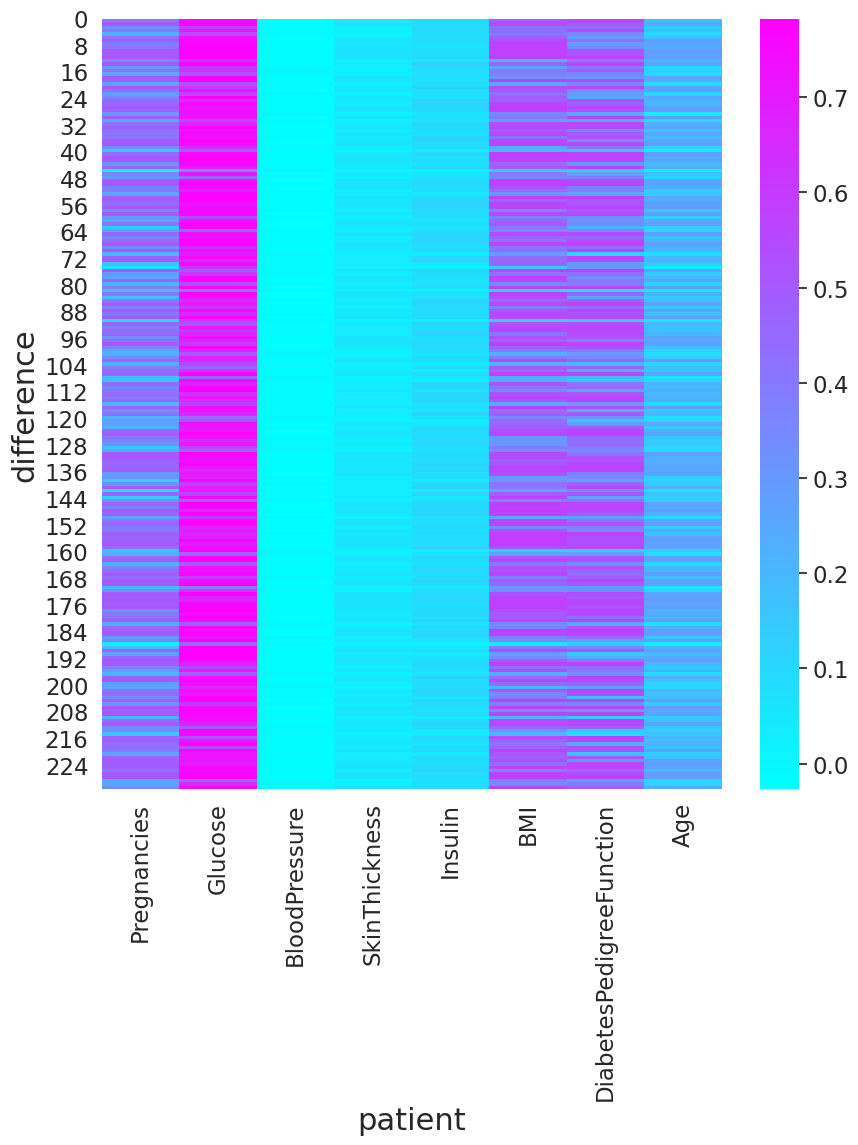

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_diff,cmap = 'cool')

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)
plt.savefig('1d_heatmap.eps', format='eps')

##Outlier Detection

####changed!

In [ ]:
row_num_double = heatmap_diff[(heatmap_diff.iloc[:,1] < 0.55)].index 
print(row_num_double.values)

[  4  16  19  39  45  47  59  63  75  79  81  91 100 104 107 119 120 129
 144 160 163 170 181 187 196 212 215 218 228]


In [ ]:
sort = heatmap_diff[heatmap_diff.index.isin(row_num_double)]
print(sort)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
4      0.228072  0.546654     -0.005857      0.015942  0.078066  0.407712   
16     0.245427  0.518227     -0.005731      0.015334  0.076698  0.387489   
19     0.255687  0.526169     -0.004781      0.012490  0.074001  0.246874   
39     0.141641  0.494827     -0.002864      0.001472  0.040701  0.205869   
45     0.019513  0.320446     -0.001236      0.009305  0.007141  0.133235   
47     0.295953  0.438877     -0.005867      0.017062  0.076452  0.363436   
59     0.314040  0.547178     -0.006375      0.017763  0.081424  0.364709   
63     0.268879  0.445169     -0.005078      0.013608  0.076520  0.327885   
75     0.506548  0.485720     -0.024064      0.059435  0.110280  0.566820   
79     0.208704  0.534015     -0.005357      0.014104  0.076434  0.331930   
81     0.170786  0.385742     -0.002039      0.011388  0.014223  0.087989   
91     0.475715  0.511961     -0.013044      0.035186  0.110398  0.516271   

In [ ]:
filter = pd.DataFrame(x_test[heatmap_diff.index.isin(row_num_double)],columns = features)
print(filter)

    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      0.028240  0.027619       0.027582       0.021681  0.011727  0.022627   
1      0.021180  0.028482       0.030537       0.024231  0.017710  0.023715   
2      0.007060  0.026180       0.031522       0.030608  0.019098  0.031765   
3      0.007060  0.020426       0.030537       0.026191  0.019098  0.023715   
4      0.000000  0.051785       0.038418       0.080347  0.003351  0.064619   
5      0.007060  0.031934       0.030537       0.016579  0.043558  0.026109   
6      0.007060  0.028482       0.028567       0.012753  0.019098  0.027632   
7      0.007060  0.030208       0.028567       0.026191  0.019098  0.026435   
8      0.014120  0.050347       0.043343       0.026191  0.019098  0.024912   
9      0.028240  0.027043       0.032015       0.028058  0.019098  0.026870   
10     0.120019  0.046894       0.035463       0.052289  0.027283  0.044493   
11     0.000000  0.038551       0.028567       0.025

In [ ]:
import statsmodels.stats.api as sms
interval = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean(), axis=0)
print(interval)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.008752  0.029505       0.031994       0.023068  0.013755  0.025242   
1     0.027279  0.036288       0.035542       0.033905  0.037731  0.033052   

   DiabetesPedigreeFunction       Age  
0                  0.013989  0.023802  
1                  0.040763  0.028430  


array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

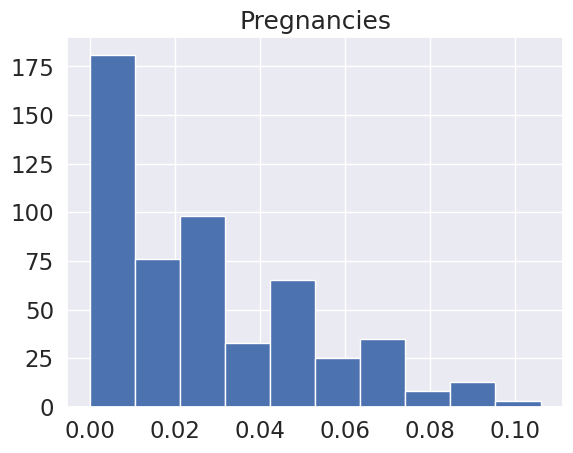

In [ ]:
x_train_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

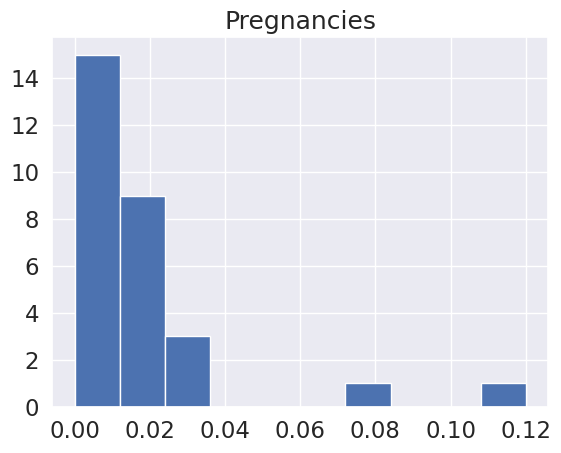

In [ ]:
filter.hist(column="Pregnancies")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

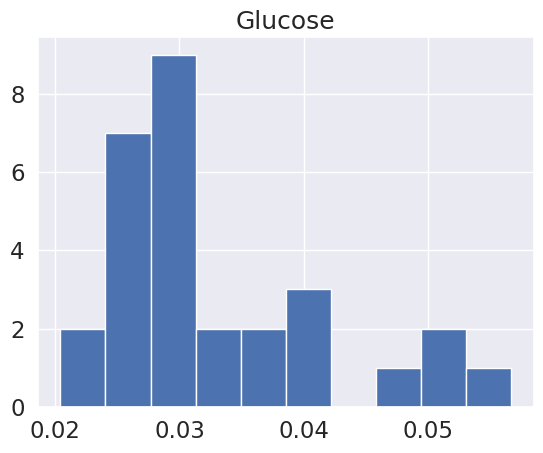

In [ ]:
filter.hist(column="Glucose")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

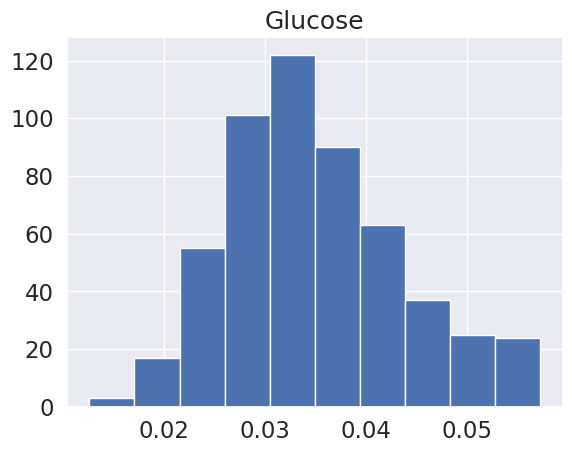

In [ ]:
x_train_df.hist(column="Glucose")

In [ ]:
import statsmodels.stats.api as sms
confid = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]
print(low_bd)
print(high_bd)

[0.00875157 0.02950544 0.03199352 0.02306766 0.01375549 0.02524188
 0.01398945 0.02380184]
[0.02727856 0.03628762 0.03554218 0.03390539 0.03773109 0.03305213
 0.04076334 0.0284298 ]


####changed!

In [ ]:
train_ref = x_train_df[ (x_train_df.iloc[:,1] < high_bd[1]) & (x_train_df.iloc[:,1] > low_bd[1])].index 
print(len(train_ref.values))

178


In [ ]:
train_clean_data = x_train_df[~x_train_df.index.isin(train_ref)]
print(train_clean_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.035300  0.012659       0.030537       0.026191  0.019098  0.027196   
1       0.070600  0.037113       0.037433       0.035710  0.029198  0.039054   
2       0.028240  0.042579       0.029552       0.034434  0.076106  0.033615   
3       0.091779  0.044017       0.043343       0.047188  0.033506  0.044167   
4       0.007060  0.036825       0.023642       0.057390  0.046429  0.044058   
..           ...       ...            ...            ...       ...       ...   
531     0.014120  0.056676       0.034478       0.057390  0.129955  0.033180   
532     0.028240  0.037113       0.042358       0.025507  0.064618  0.038184   
533     0.028240  0.027331       0.031522       0.026191  0.019098  0.034811   
534     0.028240  0.027906       0.029552       0.029333  0.019098  0.030678   
536     0.056480  0.056388       0.037433       0.036985  0.067012  0.040795   

     DiabetesPedigreeFunction       Age

In [ ]:
y_train_df = pd.DataFrame(y_train)
print(y_train_df)

     0
0    0
1    0
2    1
3    0
4    1
..  ..
532  0
533  1
534  0
535  1
536  1

[537 rows x 1 columns]


In [ ]:
y_train_clean_data = y_train_df[~y_train_df.index.isin(train_ref)]
print(y_train_clean_data)

     0
0    0
1    0
2    1
3    0
4    1
..  ..
531  1
532  0
533  1
534  0
536  1

[359 rows x 1 columns]


###Train new model

In [ ]:
model_clean = Sequential()

model_clean.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model_clean.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model_clean.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))


model_clean.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_clean.fit(train_clean_data, y_train_clean_data, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model_clean.evaluate(train_clean_data, y_train_clean_data, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model_clean.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 79.11
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [ ]:
prediction_max_clean = []
for j in range(8):
  X_max = np.copy(x_test)
  for i in range(len(x_test)):
    X_max[i][j] = max[j]
  _, accuracy = model_clean.evaluate(X_max, y_test, verbose=0)
  predictions_sub_max = model_clean.predict(X_max) 
  if len(prediction_max_clean) == 0:
    prediction_max_clean = predictions_sub_max
  else:
    prediction_max_clean = np.concatenate((prediction_max_clean, predictions_sub_max), axis=1)
print(prediction_max_clean)


8/8 [==============================] - 0s 2ms/step
[[0.39732674 0.8495332  0.13937235 ... 0.52495706 0.7047897  0.20793618]
 [0.72582763 0.8411984  0.3673272  ... 0.8486422  0.87507975 0.3715224 ]
 [0.31918144 0.63414973 0.07379449 ... 0.45314637 0.50588953 0.15729442]
 ...
 [0.23688444 0.49689037 0.03987199 ... 0.39927506 0.2836888  0.09603449]
 [0.23736142 0.72373474 0.05606511 ... 0.3518971  0.41959402 0.12100542]
 [0.9190677  0.89885    0.66209745 ... 0.8793979  0.91805685 0.83151585]]


In [ ]:
prediction_min_clean = []
for j in range(8):
  X_min = np.copy(x_test)
  for i in range(len(x_test)):
    X_min[i][j] = min[j]
  _, accuracy = model_clean.evaluate(X_min, y_test, verbose=0)
  predictions_sub_min = model_clean.predict(X_min) 
  if len(prediction_min_clean) == 0:
    prediction_min_clean = predictions_sub_min
  else:
    prediction_min_clean = np.concatenate((prediction_min_clean, predictions_sub_min), axis=1)
print(prediction_min_clean)

8/8 [==============================] - 0s 2ms/step
[[0.07306396 0.04955683 0.144066   ... 0.06492853 0.14295924 0.09246706]
 [0.2404202  0.04709034 0.37634075 ... 0.26052222 0.3441411  0.18661486]
 [0.05307726 0.02341529 0.07647595 ... 0.0494907  0.06594927 0.06754889]
 ...
 [0.03664372 0.01900868 0.04149154 ... 0.040369   0.02986195 0.03996843]
 [0.03628828 0.02954637 0.05814277 ... 0.03495737 0.04512197 0.05071871]
 [0.6374795  0.11590858 0.6706765  ... 0.32650405 0.49472052 0.6569974 ]]


In [ ]:
result_clean = np.subtract(prediction_max_clean, prediction_min_clean)
heatmap_diff_clean = pd.DataFrame(result_clean, columns = [data.columns[0:8]])
print(heatmap_diff_clean)
print(heatmap_diff_clean.describe().T)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.324263  0.799976     -0.004694      0.075199  0.147763  0.460029   
1      0.485407  0.794108     -0.009014      0.143072  0.073203  0.588120   
2      0.266104  0.610734     -0.002681      0.047895  0.130513  0.403656   
3      0.349219  0.764816     -0.004365      0.066635  0.165780  0.429360   
4      0.174714  0.582684     -0.001783      0.033332  0.111498  0.381608   
..          ...       ...           ...           ...       ...       ...   
226    0.482508  0.797732     -0.009096      0.143951  0.108927  0.597058   
227    0.475233  0.818941     -0.008694      0.139229  0.130028  0.577301   
228    0.200241  0.477882     -0.001620      0.029518  0.094698  0.358906   
229    0.201073  0.694188     -0.002078      0.037188  0.122323  0.316940   
230    0.281588  0.782941     -0.008579      0.134720  0.079255  0.552894   

    DiabetesPedigreeFunction       Age  
0                   0.561830  0.11

Text(83.25, 0.5, 'difference')

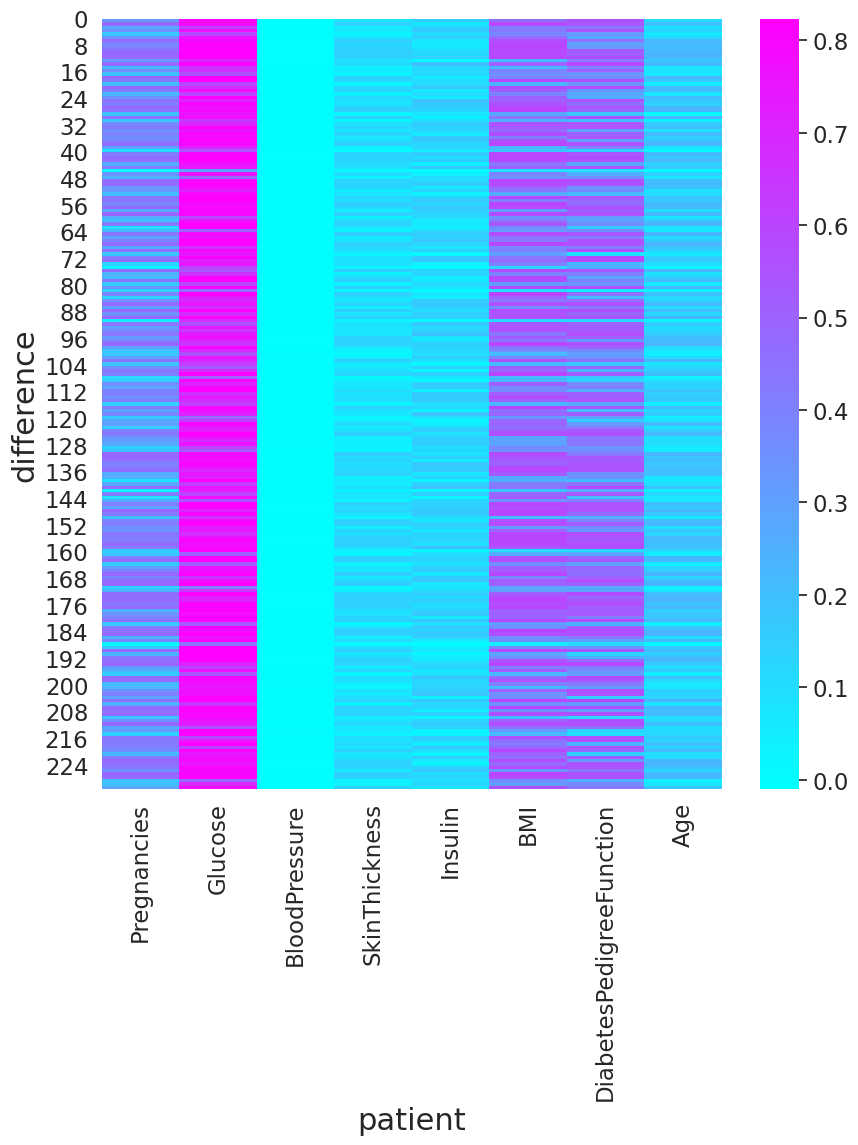

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_diff_clean,cmap = 'cool')

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

###Validation

####changed!

In [ ]:
check_row_num_double= heatmap_diff_clean[(heatmap_diff_clean.iloc[:,1] < 0.55)].index 
print(check_row_num_double)

Int64Index([ 39,  45,  47,  63,  75,  81, 104, 107, 119, 129, 144, 160, 163,
            170, 181, 187, 196, 228],
           dtype='int64')


In [ ]:
print(row_num_double)

Int64Index([  4,  16,  19,  39,  45,  47,  59,  63,  75,  79,  81,  91, 100,
            104, 107, 119, 120, 129, 144, 160, 163, 170, 181, 187, 196, 212,
            215, 218, 228],
           dtype='int64')


## Confidence interval MAX - MIN

In [ ]:
import statsmodels.stats.api as sms
x_test_df = pd.DataFrame(x_test, columns = [data.columns[0:8]])
confid = x_test_df.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [ ]:
print(low_bd)
print(high_bd)

[0.02592853 0.03412377 0.0354592  0.03187318 0.02432258 0.0339663
 0.02743483 0.03371798]
[0.03201813 0.0364496  0.03692008 0.03512155 0.03054805 0.03595773
 0.03338002 0.03696707]


In [ ]:
print(min)
print(max)

[0.         0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]
[0.12001927 0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]


In [ ]:
prediction_high = []
for j in range(8):
  X_high = np.copy(x_test)
  for i in range(len(x_test)):
    X_high[i][j] = high_bd[j]
  _, accuracy = model.evaluate(X_high, y_test, verbose=0)
  predictions_sub_high = model.predict(X_high) 
  if len(prediction_high) == 0:
    prediction_high = predictions_sub_high
  else:
    prediction_high = np.concatenate((prediction_high, predictions_sub_high), axis=1)
print(prediction_high)


8/8 [==============================] - 0s 3ms/step
[[0.14950958 0.37531292 0.17264773 ... 0.18642968 0.2616412  0.1435355 ]
 [0.42003095 0.3967195  0.43731982 ... 0.5395452  0.532827   0.25599855]
 [0.10371821 0.14890698 0.08583875 ... 0.13310775 0.1200899  0.10557367]
 ...
 [0.07345039 0.09133556 0.04764853 ... 0.11025203 0.04944233 0.06550294]
 [0.07626629 0.21050082 0.0694478  ... 0.09860552 0.09043159 0.08578718]
 [0.71990955 0.4232323  0.619476   ... 0.49217886 0.5747149  0.68921375]]


In [ ]:
prediction_low = []
for j in range(8):
  X_low = np.copy(x_test)
  for i in range(len(x_test)):
    X_low[i][j] = low_bd[j]
  _, accuracy = model.evaluate(X_low, y_test, verbose=0)
  predictions_sub_low = model.predict(X_low) 
  if len(prediction_low) == 0:
    prediction_low = predictions_sub_low
  else:
    prediction_low = np.concatenate((prediction_low, predictions_sub_low), axis=1)
print(prediction_low)


8/8 [==============================] - 0s 2ms/step
[[0.13553055 0.32069978 0.17339821 ... 0.16851819 0.24144104 0.13423264]
 [0.39242926 0.34069017 0.43861088 ... 0.5089301  0.5060391  0.24146159]
 [0.09354972 0.12086467 0.08625122 ... 0.11956631 0.10920195 0.09844837]
 ...
 [0.06603071 0.07320268 0.04788711 ... 0.09877092 0.04467478 0.06089792]
 [0.0685832  0.17321996 0.06978752 ... 0.08821694 0.08198208 0.07987802]
 [0.69625896 0.36572838 0.6207117  ... 0.4615574  0.5482927  0.67230624]]


In [ ]:
result_bd = np.subtract(prediction_high, prediction_low)
print(result_bd.shape)

(231, 8)


In [ ]:
heatmap_bd_diff = pd.DataFrame(result_bd, columns = [data.columns[0:8]])
print(heatmap_bd_diff)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.013979  0.054613     -0.000750      0.001704  0.001659  0.017911   
1      0.027602  0.056029     -0.001291      0.002950  0.002827  0.030615   
2      0.010168  0.028042     -0.000412      0.000964  0.000916  0.013541   
3      0.014067  0.045258     -0.000634      0.001398  0.001412  0.014471   
4      0.006619  0.026456     -0.000292      0.000710  0.000673  0.013124   
..          ...       ...           ...           ...       ...       ...   
226    0.028205  0.054038     -0.001267      0.002896  0.002774  0.028579   
227    0.024586  0.060120     -0.001229      0.002804  0.002683  0.025756   
228    0.007420  0.018133     -0.000239      0.000574  0.000524  0.011481   
229    0.007683  0.037281     -0.000340      0.000807  0.000780  0.010389   
230    0.023651  0.057504     -0.001236      0.002873  0.002802  0.030621   

    DiabetesPedigreeFunction       Age  
0                   0.020200  0.00

Text(83.25, 0.5, 'difference')

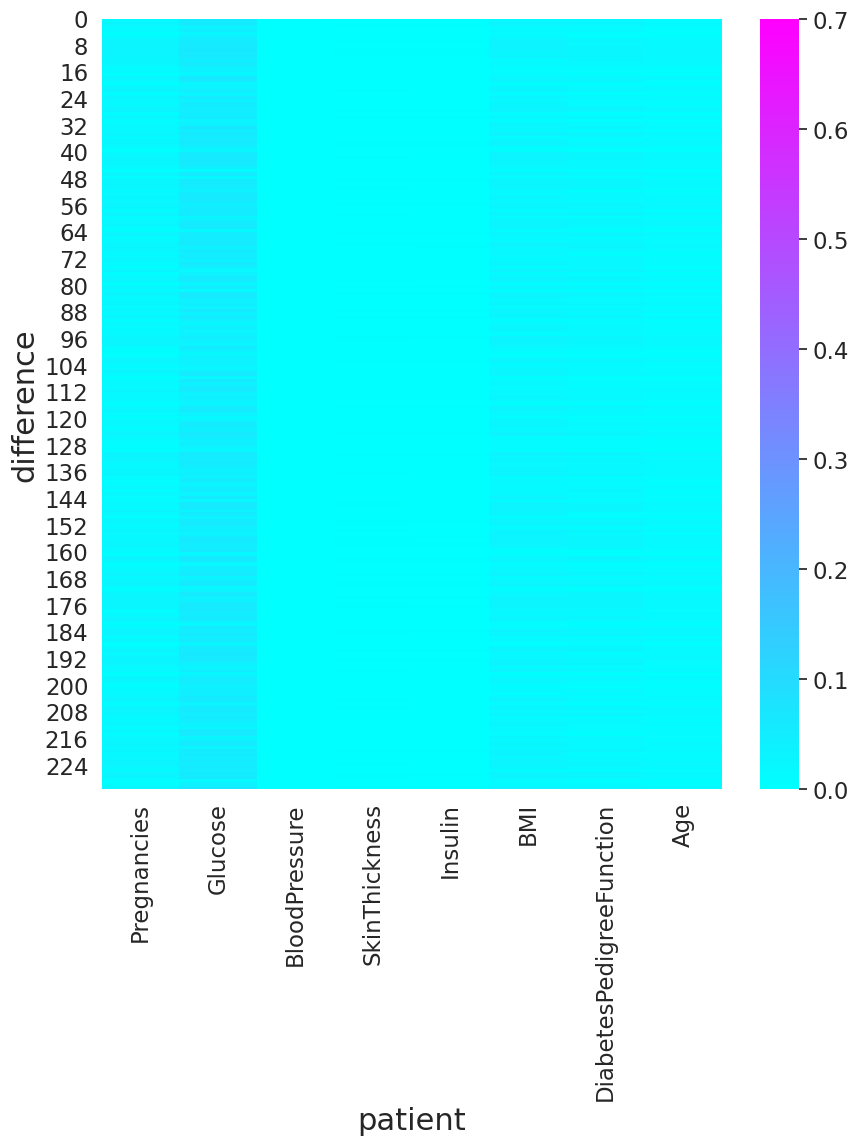

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_bd_diff,cmap = 'cool',vmin=0, vmax=0.7)

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)